<a href="https://colab.research.google.com/github/obaniah/Assignment-3-CS-4783-5783---Oday-Bani-Ahmadd/blob/main/Q1_AS_3_ML_CS_5783_ODAY_BANI_AHMAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1.1

In [ ]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


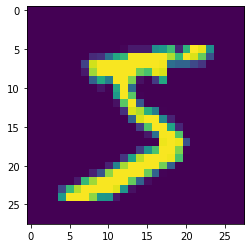

In [ ]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [ ]:
#check image shape
X_train[0].shape

(28, 28)

In [ ]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Q1- 1. A regular CNN where the number of filters in each layer **increases** as the depth of the 
network grows i.e., the Lth layer will have more filters than the (L-1)th layer. 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten , MaxPooling2D , Dropout 

#create model
model_inc_f = Sequential()
#add model layers

model_inc_f.add(Conv2D(5, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
model_inc_f.add(Conv2D(7, (3, 3), activation='relu'))
model_inc_f.add(Conv2D(8, (3, 3), activation='relu'))
model_inc_f.add(Conv2D(16, (3, 3), activation='relu'))
model_inc_f.add(Conv2D(32, (3, 3), activation='relu'))


model_inc_f.add(MaxPooling2D(pool_size=(2, 2)))
model_inc_f.add(Dropout(0.25))
 
model_inc_f.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_inc_f.add(Conv2D(128, (3, 3), activation='relu'))
model_inc_f.add(Conv2D(256, (3, 3), activation='relu'))

 
model_inc_f.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_inc_f.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))

model_inc_f.add(MaxPooling2D(pool_size=(2, 2)))
model_inc_f.add(Dropout(0.25))
 
model_inc_f.add(Flatten())
model_inc_f.add(Dense(512, activation='relu'))
model_inc_f.add(Dropout(0.5))
model_inc_f.add(Dense(10, activation= 'softmax'))


In [ ]:
#compile model using accuracy to measure model performance
model_inc_f.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model
model_inc_f.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

1875/1875 [==============================] - 34s 17ms/step - loss: 0.2535 - accuracy: 0.9215 - val_loss: 0.0556 - val_accuracy: 0.9838


In [ ]:
#compile model using accuracy to measure model performance
model_inc_f_1.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model_inc_f_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

1875/1875 [==============================] - 31s 16ms/step - loss: 0.0515 - accuracy: 0.9854 - val_loss: 0.0291 - val_accuracy: 0.9905


In [ ]:
#compile model using accuracy to measure model performance
model_inc_f_2.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])
model_inc_f_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

1875/1875 [==============================] - 43s 22ms/step - loss: 0.1028 - accuracy: 0.9740 - val_loss: 0.0987 - val_accuracy: 0.9767


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.09867478907108307 / Test accuracy: 0.9767000079154968


In [ ]:
#predict first 4 images in the test set
model_inc_f_2.predict(X_test[:4])

1/1 [==============================] - 0s 433ms/step


array([[2.9912379e-12, 2.0331228e-09, 1.2069346e-07, 4.3575793e-10,
        5.2658372e-10, 1.9619113e-12, 3.5164814e-16, 9.9999988e-01,
        1.1400603e-10, 3.4192503e-08],
       [4.2878603e-11, 1.1169775e-11, 1.0000000e+00, 1.6528334e-15,
        3.0018563e-13, 7.3656306e-18, 2.5380344e-09, 6.5136558e-16,
        1.5445949e-10, 3.7304545e-19],
       [3.9553796e-10, 9.9999964e-01, 2.5171937e-08, 3.0419278e-11,
        1.0062641e-07, 2.5163813e-09, 2.5518364e-07, 5.6847906e-08,
        4.8330833e-08, 5.6246235e-10],
       [9.9990404e-01, 1.8412391e-11, 3.5463039e-09, 1.0887654e-11,
        3.8721185e-10, 2.7231197e-09, 9.5840485e-05, 8.5865225e-11,
        6.3629592e-08, 1.0024283e-08]], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten , MaxPooling2D , Dropout 

#create model
model_dec = Sequential()
#add model layers

model_dec.add(Conv2D(1024, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
model_dec.add(Conv2D(512, (3, 3), activation='relu'))
model_dec.add(Conv2D(256, (3, 3), activation='relu'))
model_dec.add(Conv2D(125, (3, 3), activation='relu'))
model_dec.add(Conv2D(64, (3, 3), activation='relu'))


model_dec.add(MaxPooling2D(pool_size=(2, 2)))
model_dec.add(Dropout(0.25))
 
model_dec.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model_dec.add(Conv2D(16, (3, 3), activation='relu'))
model_dec.add(Conv2D(8, (3, 3), activation='relu'))

 
model_dec.add(Conv2D(7, (3, 3), padding='same', activation='relu'))
model_dec.add(Conv2D(5, (3, 3), padding='same', activation='relu'))

model_dec.add(MaxPooling2D(pool_size=(1, 1)))
model_dec.add(Dropout(0.25))
 
model_dec.add(Flatten())
model_dec.add(Dense(8, activation='relu'))
model_dec.add(Dropout(0.5))
model_dec.add(Dense(10, activation= 'softmax'))


In [ ]:
#compile model using accuracy to measure model performance
model_dec.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model
model_dec.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 166s 87ms/step - loss: 1.4664 - accuracy: 0.4312 - val_loss: 0.3248 - val_accuracy: 0.9396
Epoch 2/3
1875/1875 [==============================] - 161s 86ms/step - loss: 1.0109 - accuracy: 0.5893 - val_loss: 0.2437 - val_accuracy: 0.9577
Epoch 3/3
1875/1875 [==============================] - 161s 86ms/step - loss: 0.9306 - accuracy: 0.6393 - val_loss: 0.1935 - val_accuracy: 0.9647


In [ ]:
#compile model using accuracy to measure model performance
model_dec_1.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model_dec_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 160s 85ms/step - loss: 0.8891 - accuracy: 0.6525 - val_loss: 0.1591 - val_accuracy: 0.9749
Epoch 2/3
1875/1875 [==============================] - 160s 85ms/step - loss: 0.8560 - accuracy: 0.6736 - val_loss: 0.1542 - val_accuracy: 0.9787
Epoch 3/3
1875/1875 [==============================] - 160s 85ms/step - loss: 0.8438 - accuracy: 0.6825 - val_loss: 0.1431 - val_accuracy: 0.9786


In [ ]:
#compile model using accuracy to measure model performance
model_dec_2.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])
model_dec_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 163s 86ms/step - loss: 0.8726 - accuracy: 0.6934 - val_loss: 0.1521 - val_accuracy: 0.9725
Epoch 2/3
1875/1875 [==============================] - 161s 86ms/step - loss: 0.8769 - accuracy: 0.7006 - val_loss: 0.1685 - val_accuracy: 0.9740
Epoch 3/3
1875/1875 [==============================] - 161s 86ms/step - loss: 0.9131 - accuracy: 0.6939 - val_loss: 0.2529 - val_accuracy: 0.9548


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten , MaxPooling2D , Dropout 

#create model
model_HG = Sequential()
#add model layers

model_HG.add(Conv2D(5, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
model_HG.add(Conv2D(7, (3, 3), activation='relu'))
model_HG.add(Conv2D(8, (3, 3), activation='relu'))
model_HG.add(Conv2D(16, (3, 3), activation='relu'))
model_HG.add(Conv2D(32, (3, 3), activation='relu'))


model_HG.add(MaxPooling2D(pool_size=(2, 2)))
model_HG.add(Dropout(0.25))
 
model_HG.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model_HG.add(Conv2D(8, (3, 3), activation='relu'))
model_HG.add(Conv2D(7, (3, 3), activation='relu'))

 
model_HG.add(Conv2D(5, (3, 3), padding='same', activation='relu'))
model_HG.add(Conv2D(3, (3, 3), padding='same', activation='relu'))

model_HG.add(MaxPooling2D(pool_size=(2, 2)))
model_HG.add(Dropout(0.25))
 
model_HG.add(Flatten())
model_HG.add(Dense(512, activation='relu'))
model_HG.add(Dropout(0.5))
model_HG.add(Dense(10, activation= 'softmax'))


In [ ]:
#compile model using accuracy to measure model performance
model_HG.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model
model_HG.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25 , )

Epoch 1/3
1875/1875 [==============================] - 161s 85ms/step - loss: 0.8231 - accuracy: 0.7335 - val_loss: 0.1897 - val_accuracy: 0.9433
Epoch 2/3
1875/1875 [==============================] - 177s 95ms/step - loss: 0.2643 - accuracy: 0.9212 - val_loss: 0.1116 - val_accuracy: 0.9671
Epoch 3/3
1875/1875 [==============================] - 165s 88ms/step - loss: 0.2031 - accuracy: 0.9407 - val_loss: 0.0922 - val_accuracy: 0.9723


In [ ]:
#compile model using accuracy to measure model performance
model_HG_sgd.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model_HG_sgd.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25)

1875/1875 [==============================] - 166s 88ms/step - loss: 0.1690 - accuracy: 0.9495 - val_loss: 0.0821 - val_accuracy: 0.9764


In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25)

1875/1875 [==============================] - 166s 88ms/step - loss: 0.1688 - accuracy: 0.9516 - val_loss: 0.0756 - val_accuracy: 0.9778
